<a href="https://colab.research.google.com/github/mlacasa/2BATMates/blob/main/IntegralGaussiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Integración de $ e^{-x^2} $ en $ \mathbb{R} $ usando el Teorema de Fubini

El objetivo es calcular la integral impropia:
$$
I = \int_{-\infty}^{\infty} e^{-x^2} \, dx
$$
Esta integral no puede resolverse directamente con técnicas elementales, pero se puede evaluar utilizando el **Teorema de Fubini** y un cambio a coordenadas polares.

---

## Paso 1: Elevar al cuadrado la integral

Definimos $ I $ como:
$$
I = \int_{-\infty}^{\infty} e^{-x^2} \, dx
$$
Al elevar al cuadrado:
$$
I^2 = \left( \int_{-\infty}^{\infty} e^{-x^2} \, dx \right) \left( \int_{-\infty}^{\infty} e^{-y^2} \, dy \right)
$$
Esto se reescribe como una integral doble en $ \mathbb{R}^2 $:
$$
I^2 = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-x^2 - y^2} \, dx \, dy
$$

---

## Paso 2: Aplicar el Teorema de Fubini

La función $ e^{-x^2 - y^2} $ es no negativa y continua en $ \mathbb{R}^2 $. Por el **Teorema de Tonelli** (caso particular del Teorema de Fubini para funciones no negativas), podemos calcular la integral doble como iterada:
$$
I^2 = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-(x^2 + y^2)} \, dx \, dy
$$

---

## Paso 3: Cambio a coordenadas polares

Transformamos $ (x, y) $ a coordenadas polares $ (r, \theta) $:
$$
x = r \cos\theta, \quad y = r \sin\theta
$$
El Jacobiano de la transformación es $ r $, por lo que:
$$
dx \, dy = r \, dr \, d\theta
$$
Además, $ x^2 + y^2 = r^2 $. Los límites de integración pasan a ser:
- $ r \in [0, \infty) $
- $ \theta \in [0, 2\pi) $

La integral se convierte en:
$$
I^2 = \int_{0}^{2\pi} \int_{0}^{\infty} e^{-r^2} \cdot r \, dr \, d\theta
$$

---

## Paso 4: Separar las integrales

La integral doble se factoriza como el producto de dos integrales simples:
$$
I^2 = \left( \int_{0}^{2\pi} d\theta \right) \left( \int_{0}^{\infty} r e^{-r^2} \, dr \right)
$$

### Integral angular:
$$
\int_{0}^{2\pi} d\theta = 2\pi
$$

### Integral radial:
Hacemos la sustitución $ u = r^2 $, con $ du = 2r \, dr $, luego $ r \, dr = \frac{du}{2} $:
$$
\int_{0}^{\infty} r e^{-r^2} \, dr = \frac{1}{2} \int_{0}^{\infty} e^{-u} \, du = \frac{1}{2} \left[ -e^{-u} \right]_0^{\infty} = \frac{1}{2}(1) = \frac{1}{2}
$$

---

## Paso 5: Combinar resultados

Multiplicamos las integrales:
$$
I^2 = 2\pi \cdot \frac{1}{2} = \pi
$$
Finalmente, tomamos la raíz cuadrada:
$$
I = \sqrt{\pi}
$$

---

## Conclusión

La integral de $ e^{-x^2} $ en $ \mathbb{R} $ es:
$$
\boxed{ \int_{-\infty}^{\infty} e^{-x^2} \, dx = \sqrt{\pi} }
$$
Este resultado es fundamental en probabilidad y análisis, conocido como la **integral de Gauss**.
```

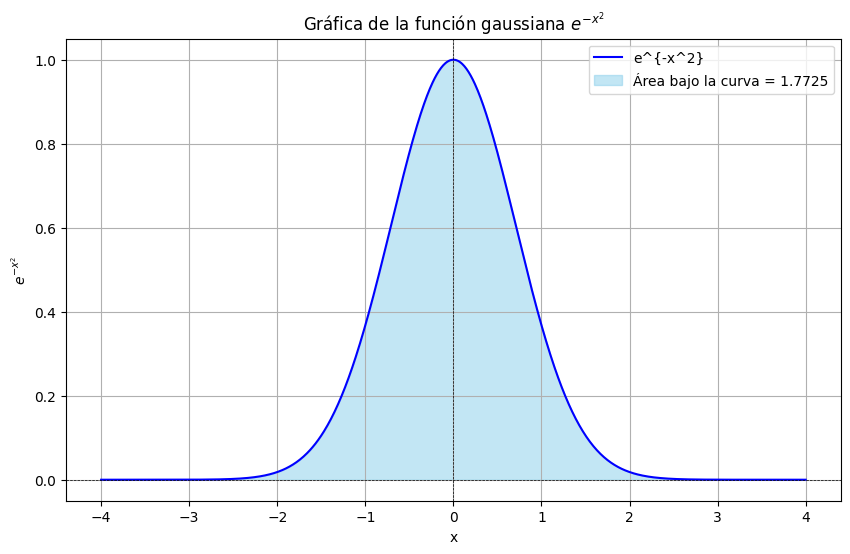

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definir la función gaussiana
def gaussian(x):
    return np.exp(-x**2)

# Definir el rango para la gráfica
x = np.linspace(-4, 4, 1000)
y = gaussian(x)

# Calcular el área bajo la curva (integral) usando quad
integral, _ = quad(gaussian, -np.inf, np.inf)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='e^{-x^2}', color='b')
plt.fill_between(x, y, alpha=0.5, color='skyblue', label=f'Área bajo la curva = {integral:.4f}')
plt.title('Gráfica de la función gaussiana $e^{-x^2}$')
plt.xlabel('x')
plt.ylabel('$e^{-x^2}$')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()

In [3]:
import numpy as np
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Crear un rango de valores para x y y
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
x, y = np.meshgrid(x, y)

# Calcular la función gaussiana
z = np.exp(-x**2 - y**2)

# Crear la figura
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale='Viridis')])

# Actualizar el diseño del gráfico
fig.update_layout(title='Superficie de $e^{-x^2 - y^2}$',
                  scene=dict(
                      xaxis_title='X',
                      yaxis_title='Y',
                      zaxis_title='$e^{-x^2 - y^2}$'
                  ))

# Mostrar el gráfico
fig.show()

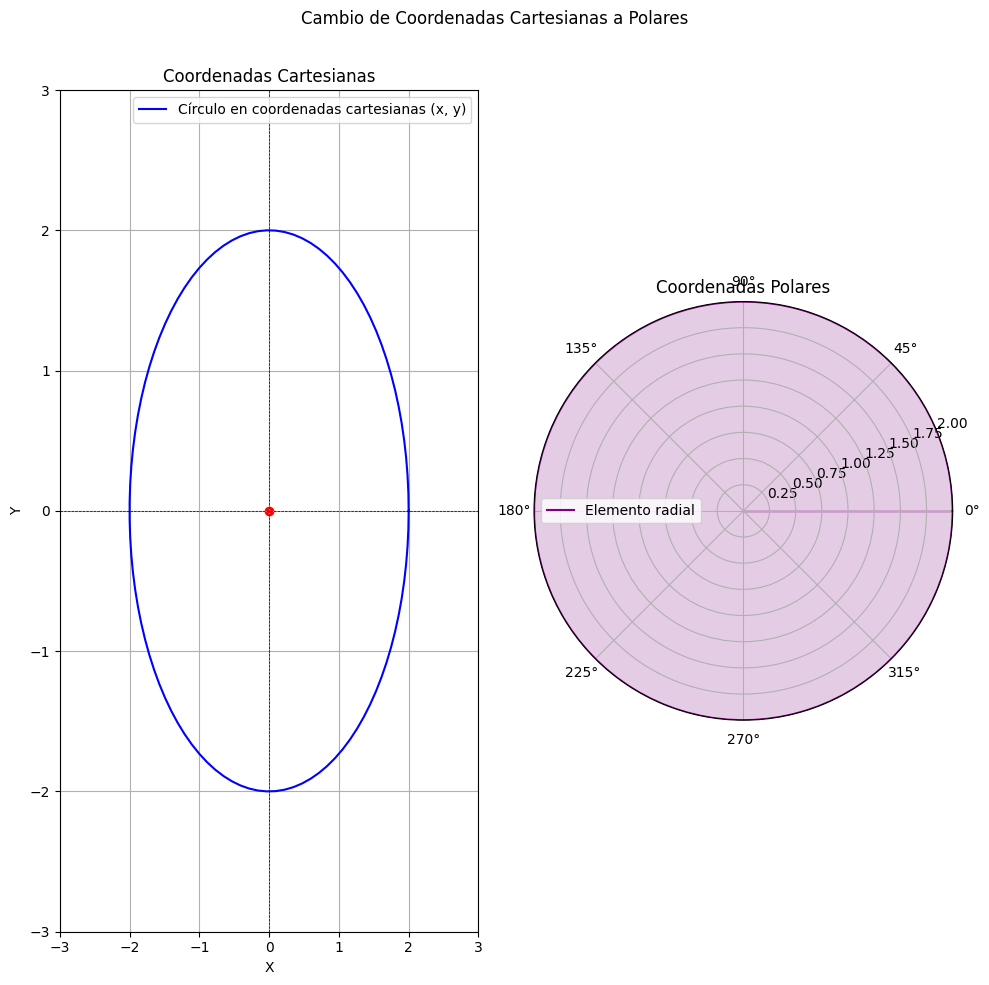

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un conjunto de puntos en coordenadas cartesianas
theta = np.linspace(0, 2 * np.pi, 100)
r = 2  # Radio arbitrario

# Convertir a coordenadas cartesianas
x = r * np.cos(theta)
y = r * np.sin(theta)

# Crear la figura
plt.figure(figsize=(10, 10))

# Gráfica en coordenadas cartesianas
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Círculo en coordenadas cartesianas (x, y)', color='b')
plt.scatter(0, 0, color='red')  # Origen
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.title('Coordenadas Cartesianas')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()

# Gráfica en coordenadas polares
ax = plt.subplot(1, 2, 2, polar=True)
ax.plot(theta, np.ones_like(theta) * r, label='Elemento radial', color='purple')
ax.fill_between(theta, 0, np.ones_like(theta) * r, color='purple', alpha=0.2)
ax.set_title('Coordenadas Polares')
ax.set_ylim(0, r)  # Establecer el límite del radio
ax.set_xticks(np.pi/180. * np.arange(0, 360, 45))  # Establecer ticks de theta
ax.set_xticklabels(['0°', '45°', '90°', '135°', '180°', '225°', '270°', '315°'], rotation=45)
plt.legend()

# Mostrar las gráficas
plt.suptitle('Cambio de Coordenadas Cartesianas a Polares')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()